In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 
from numba import jit
from numpy import sin, pi
from pathlib import Path

%reload_ext autoreload
%aimport visualization
%aimport species_transport
%aimport parameters
from parameters import *
from fluid_flow import dt_fluid_flow
from visualization import plot_species_overview, plot_velocity_vector_field
from species_transport import evolve_species

In [17]:
NN = np.array([30, 50, 70, 100, 140])

# stability thresholds for dt_chem (found by hand for the different N):
thr = np.array([0.2, 0.6, 1.1, 1.75, 2.65]) * 2.2857e-7
Dt = np.zeros_like(thr)
for i, N in enumerate(NN):
    dx, dy, Ns_c, Nc_lw = parameters.set_resolution(N,N)
    dt = dt_fluid_flow(dx, Fo=0.3)
    Dt[i] = dt

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
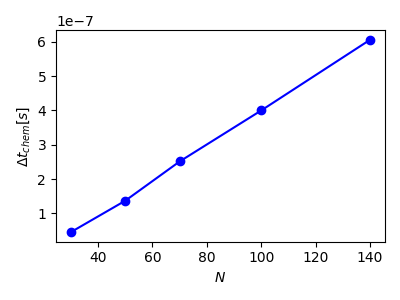

In [20]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(NN, thr, 'bo-')
ax.set_xlabel('$N$')
ax.set_ylabel('$\Delta t_{chem} [s]$')
plt.tight_layout()